## Tarea 2 del curso CM-072

* Nombre y apellidos: Bitzer Arotoma Bacilio
* Fecha de presentación: 19 de setiembre

Esta tarea utiliza un pequeño subconjunto de los datos de la competencia de Kaggle  [Yelp Business Rating Prediction ](https://www.kaggle.com/c/yelp-recsys-2013).

* Descripción de la data
    - `yelp.json` es el formato original del archivo y `yelp.csv` contiene los mismos datos, en un formato más conveniente. Ambos archivos están en esta carpeta de la tarea, por lo que no es necesario descargar los datos del sitio web de Kaggle.

    - Cada observación en este conjunto de datos es una revisión de un negocio en particular por un usuario en particular.

    - La columna "stars" es la cantidad de estrellas (1 a 5) asignadas por el revisor al negocio. (Estrellas más altas indican mejores puntuaciones.) En otras palabras, es la calificación del negocio por la persona que escribió la revisión.
 
    - La columna "cool" es la cantidad de votos "cool" que recibió esta crítica de otros usuarios de Yelp. Todas las reseñas comienzan con 0 votos "cools" y no hay límite para la cantidad de votos "cools" que puede recibir una revisión. En otras palabras, es una calificación de la revisión en sí misma, no una calificación de la empresa.
   
    - Las columnas "useful" y "funny" son similares a la columna "cool".
    
* Sugerencia: En estos ejercicios debes utilizar los siguientes commandos de scikit learn:

    - [from sklearn.linear_model import LinearRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html).
    - [from sklearn.cross_validation import train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)
    - [from sklearn import metrics](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics).

## Preguntas

1. Lea yelp.csv en un DataFrame.


In [1]:
# Tu solucion
import pandas as pd
import numpy as np
df = pd.read_csv('yelp.csv')


In [2]:
df.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


2.Ignoramos el archivo `yelp.csv` y construye un DataFrame de `yelp.json`. Esto implica leer los datos en Python, decodificar el JSON, convertirlo en un DataFrame y agregar columnas individuales para cada uno de los tipos de votos.

In [3]:
#Solución
import json 
data = []
with open('yelp.json') as f:
    for line in f:
        data.append(json.loads(line))
df = pd.DataFrame.from_dict(data)
df.head()
df.shape

(10000, 8)

In [4]:
votes=pd.DataFrame(df['votes'].to_dict()).T
votes.head()

,cool,funny,useful
0,2,0,5
1,0,0,0
2,0,0,1
3,1,0,2
4,0,0,0


In [5]:
df = df.join(pd.DataFrame(df['votes'].to_dict()).T)
df.head()

,business_id,date,review_id,stars,text,type,user_id,votes,cool,funny,useful
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,"{'funny': 0, 'cool': 2, 'useful': 5}",2,0,5
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,"{'funny': 0, 'cool': 0, 'useful': 0}",0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,"{'funny': 0, 'cool': 0, 'useful': 1}",0,0,1
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,"{'funny': 0, 'cool': 1, 'useful': 2}",1,0,2
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,"{'funny': 0, 'cool': 0, 'useful': 0}",0,0,0


In [6]:
df.drop(['votes'], inplace=True, axis=1)
df.head()

,business_id,date,review_id,stars,text,type,user_id,cool,funny,useful
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,0,5
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,0,1
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,0,2
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


3.Explora la relación entre cada uno de los tipos de votos (cool/useful/funny) y la cantidad de estrellas.

In [7]:
# Tu solucion
df_solution = votes.join(df['stars'])
df_solution.head()

,cool,funny,useful,stars
0,2,0,5,5
1,0,0,0,5
2,0,0,1,4
3,1,0,2,5
4,0,0,0,5


In [8]:
df_solution.corr()

,cool,funny,useful,stars
cool,1.000000,0.764342,0.887102,0.052555
funny,0.764342,1.000000,0.723406,-0.061306
useful,0.887102,0.723406,1.000000,-0.023479
stars,0.052555,-0.061306,-0.023479,1.000000


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:3: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  This is separate from the ipykernel package so we can avoid doing imports until


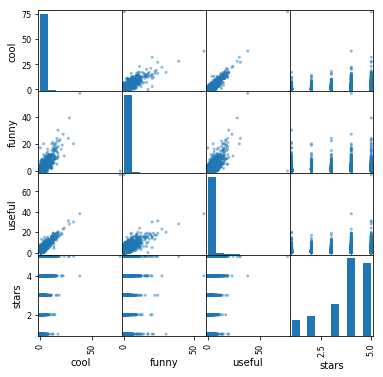

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
pd.scatter_matrix(df_solution, figsize=(6, 6))
plt.show()

4.Define `cool/ useful/funny` como características y `stars` como respuesta.

In [10]:
# Tu solucion

X = df_solution.loc[:, 'cool':'useful']
#X = X.as_matrix()
y = df_solution.loc[:,'stars']
print(X.head())
print(y.head())

   cool  funny  useful
0     2      0       5
1     0      0       0
2     0      0       1
3     1      0       2
4     0      0       0
0    5
1    5
2    4
3    5
4    5
Name: stars, dtype: int64


5.Ajustamos un modelo de regresión lineal e interpreta los coeficientes. ¿Los coeficientes tienen sentido intuitivo para ti?. Explora el sitio web de Yelp para ver si se puede detectar tendencias similares.
    

In [11]:
# Tu solucion
from sklearn.linear_model import LinearRegression
X = X.as_matrix()
y = y.as_matrix()
lr = LinearRegression(normalize=True)

In [12]:
lr.fit(X,y)
print('y = ' + str(lr.intercept_) + ' ')
for i, c in enumerate(lr.coef_):
    print(str(c) + ' * x' + str(i))

y = 3.839894792783083 
0.27435946858853066 * x0
-0.1356744905370616 * x1
-0.14745239099401516 * x2


Para la variable x0 que representa a "cool" tiene una constante de crecimiento igual a 0.27435946858853066, para x1  que es "funny" es -0.1356744905370616 y para x2 que es "useful" es -0.14745239099401516.

6.Evalua el modelo dividiendo los datos en  conjuntos de entrenamiento y prueba y calculando el RMSE. ¿El RMSE tiene un sentido intuitivo para ti?
    

In [13]:
# Tu solucion
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2)
lr.fit(X_train, Y_train)
#print("Score",lr.score(X_test, Y_test))
Y_pred = lr.predict(X_train)
rmse = np.sqrt(mean_squared_error(Y_train, Y_pred))
print("RMSE : ",rmse)
#r2 = lr.score(X_train, Y_train)
#print(r2)
#r3 = lr.score(X_test, Y_test)
#print(r3)


RMSE :  1.1913144284124935


Calcular RMSE 

7.Intenta eliminar algunas de las características y analizar  si el RMSE mejora.
   

In [14]:
# Eliminando la primera columna "cool"
filtro = np.array([False, True, True])
X1 = X_train[:,filtro]
lr.fit(X1, Y_train)
Y_pred1 = lr.predict(X1)
rmse = np.sqrt(mean_squared_error(Y_train, Y_pred1))
print("RMSE : ",rmse)
print("Score : ",lr.score(X1,Y_train))

RMSE :  1.2135440455564674
Score :  0.0038962835343961943


In [15]:
# Eliminando la segunda columna "funny"
filtro = np.array([True, False, True])
X2 = X_train[:,filtro]
lr.fit(X2, Y_train)
Y_pred2 = lr.predict(X2)
rmse = np.sqrt(mean_squared_error(Y_train, Y_pred2))
print("RMSE : ",rmse)
print("Score : ",lr.score(X2,Y_train))

RMSE :  1.2010405929224497
Score :  0.02431675946175016


In [16]:
# Eliminando la tercera columna "useful"
filtro = np.array([True, True, False])
X3 = X_train[:,filtro]
lr.fit(X3, Y_train)
Y_pred3 = lr.predict(X3)
rmse = np.sqrt(mean_squared_error(Y_train, Y_pred3))
print("RMSE : ",rmse)
print("Score : ",lr.score(X3,Y_train))

RMSE :  1.2012647199120823
Score :  0.02395257967873288


Observando los tres casos anteriores, en la que se elimina solo un caracteristica, notamos que elRMSE en el mejor de los casos es de 1.199579958055843 que es en el caso que se elimina la caracteristica "funny".

8.(Obligatorio) Piensa en algunas características nuevas que podrías crear a partir de los datos existentes que pueden ser predictivos de la respuesta. Descubre cómo crear esas características en Pandas, agrégalas a tu modelo y ve si el RMSE mejora.
    

In [17]:
# Tu solucion


9.Compara tu mejor RMSE en el conjunto de prueba con el RMSE para  un "modelo nulo", que es el modelo que ignora todas las características y simplemente predice el valor medio de respuesta en el conjunto de prueba.
    

In [18]:
# Tu solucion

10.En lugar de tratar este problema por regresión, como sería si fuese un problema de clasificación y qué precisión en el conjunto prueba se puede lograr con KNN.
   

In [19]:
# Tu solucion
from sklearn.neighbors import KNeighborsClassifier
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, Y_train)
print("Score : ",knn.score(X_test, Y_test))


Score :  0.27


11.Descubre cómo usar la regresión lineal en  clasificación y compara el valor de  precisión de clasificación con la precisión del algoritmo KNN.

In [20]:
# Tu solucion

12.Lee el archivo `advertising.csv` y almacena este conjunto de datos en un Dataframe  llamado `datos`.

In [21]:
# Tu solucion
datos = pd.read_csv('advertising.csv')
type(datos)

pandas.core.frame.DataFrame

In [22]:
datos.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


13.Usa `info` y  `describe` en `datos`. Analiza tu respuesta.

In [23]:
# Tu solucion
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
Daily Time Spent on Site    1000 non-null float64
Age                         1000 non-null int64
Area Income                 1000 non-null float64
Daily Internet Usage        1000 non-null float64
Ad Topic Line               1000 non-null object
City                        1000 non-null object
Male                        1000 non-null int64
Country                     1000 non-null object
Timestamp                   1000 non-null object
Clicked on Ad               1000 non-null int64
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [24]:
datos.describe()


,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


14.Usemos seaborn para explorar los datos. Realiza los siguientes gráficos  que se muestran a continuación!

   - Crea un histograma para `age`
   - Crea un `joinplot` que muestre `Area Income` versus `Age`.
   - Crea un `joinplot` que muestre las distribuciones kde de  `Daily Time spent on site` vs. `Age`.
   - Crea un `joinplot `de `Daily Time Spent on Site` vs. `Daily Internet Usage`.
   - Crea un `pairplot` con `hue` definido por la característica de la columna `Clicked on Ad`. 
   
 Analiza tus resultados.

/home/bitzer/.local/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


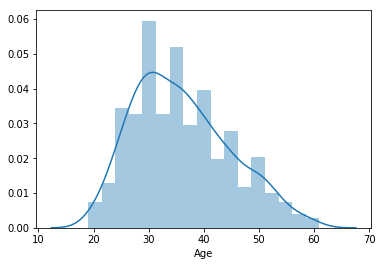

In [25]:
# Tu solucion
import seaborn as sb
sb.distplot(datos.Age)

/home/bitzer/.local/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


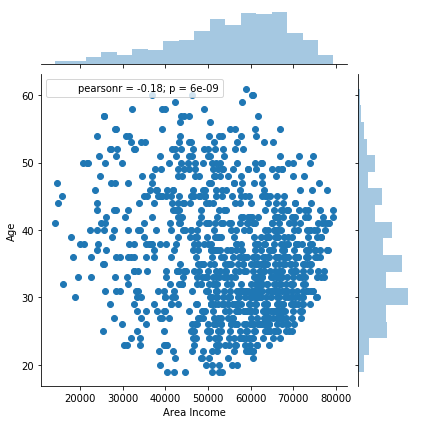

In [26]:
sb.jointplot(datos.loc[:,"Area Income"], datos.Age)


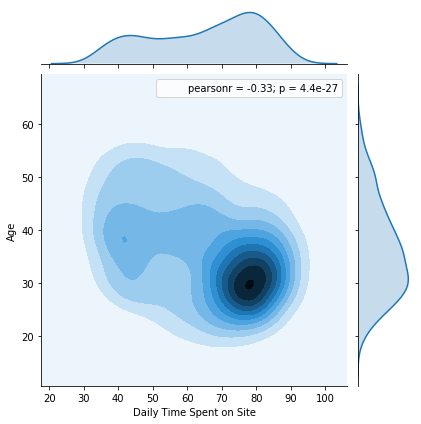

In [27]:
sb.jointplot(datos.loc[:, "Daily Time Spent on Site"], datos.Age, kind="kde")


/home/bitzer/.local/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


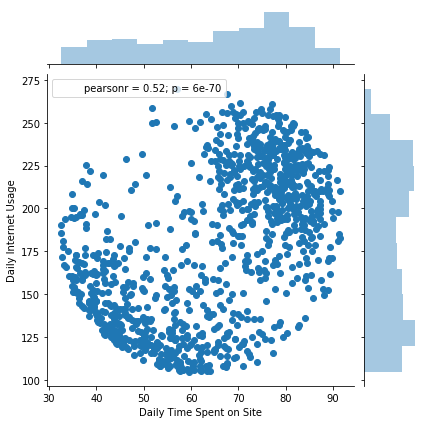

In [28]:
sb.jointplot(datos.loc[:,"Daily Time Spent on Site"], datos.loc[:, "Daily Internet Usage"])


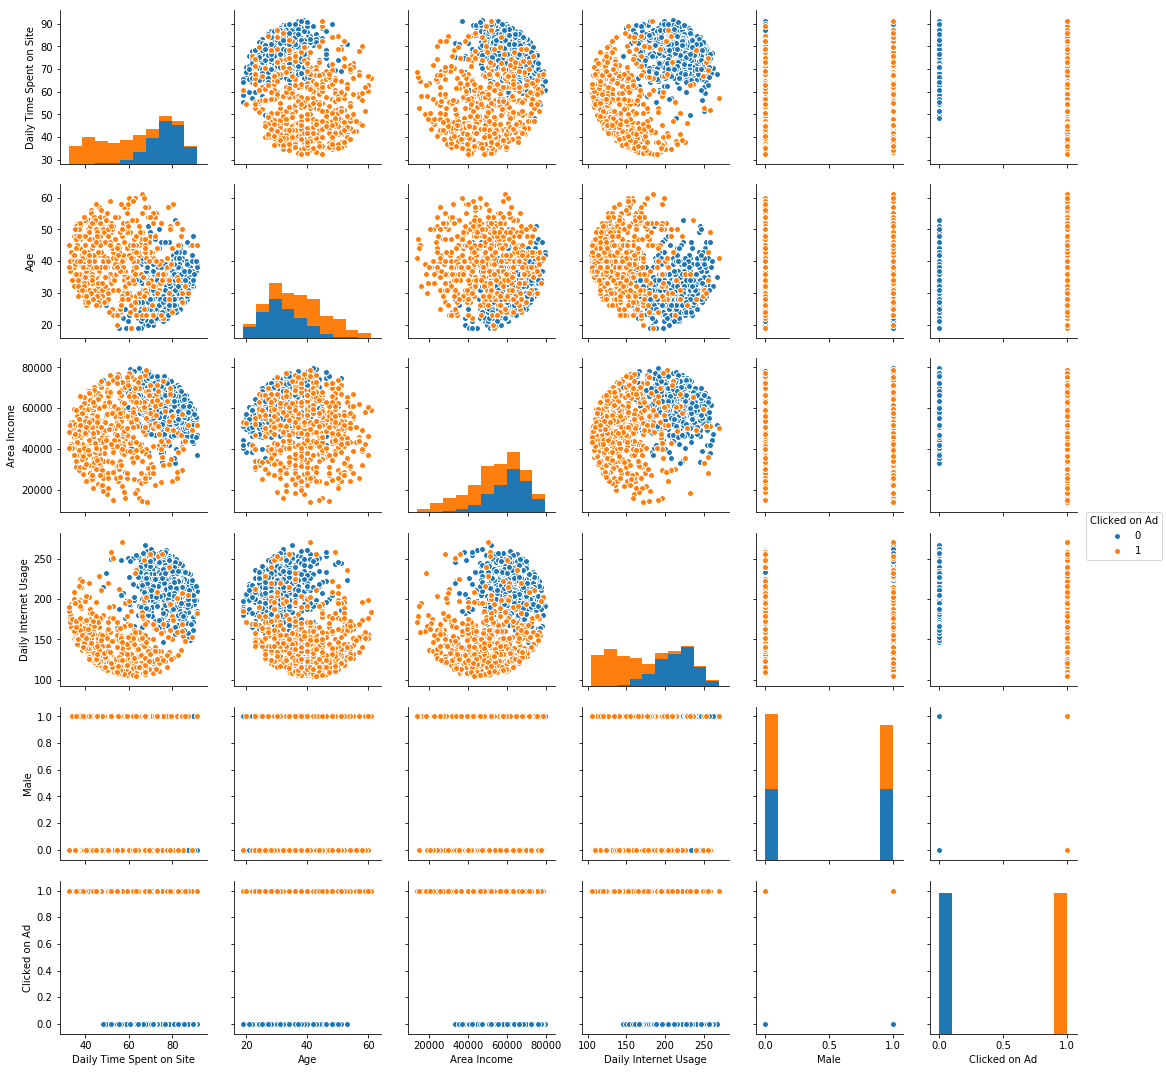

In [29]:
sb.pairplot(datos, hue="Clicked on Ad")


15.(Obligatorio).  Asumiendo que:

```
datos.drop(['Ad Topic Line', 'City', 'Country', 'Timestamp'], axis=1, inplace=True)
X = datos.drop(['Clicked on Ad'], axis = 1)
y = datos['Clicked on Ad']
```

- Divide los datos en el conjunto de entrenamiento y prueba usando `train_test_split`.
- Entrena y ajusta un modelo de regresión logística en el conjunto de entrenamiento.
- Pronostica valores para los datos de prueba.
- Crea un informe de clasificación para el modelo. Utiliza `classification_report`.

In [30]:
# Tu solucion
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
logR = LogisticRegression()
datos.drop(['Ad Topic Line', 'City', 'Country', 'Timestamp'], axis=1, inplace=True)
X = datos.drop(['Clicked on Ad'], axis = 1)
y = datos['Clicked on Ad']
X_train, X_test, Y_train, Y_test = train_test_split(X, y)
logR.fit(X_train, Y_train)
Y_pred = logR.predict(X_test)
print(classification_report(Y_test, Y_pred))


             precision    recall  f1-score   support

          0       0.86      0.91      0.89       128
          1       0.90      0.84      0.87       122

avg / total       0.88      0.88      0.88       250



16.(Obligatorio) Presenta un reporte del siguiente artículo de Sebastian Raschka: [Naive Bayes and Text Classification](http://sebastianraschka.com/Articles/2014_naive_bayes_1.html).

# Naive Bayes and Text Classification
## Introducción
Uno de los problemas que se plantearon durante mucho tiempo es si existe la posibilidad de construir modelos que aprenda de datos establecidos para posteriormente tomar decisiones correctas y predicciones de nuevos datos. uno de los modelos que se propone es la de clasificación supervisada de patrones la cual consiste en entrenar datos etiquetados para luego etiquetar data nueva, esta etiqueta en muchos casos es la binarización como 1 y 0 en casos de si posees una enfermedad, si el correo es spam que es el ejemplo que se exploró en el articulo y el modelo que se usara sera el de Naive Bayes que se basa en el Teorema de Bayes. 

## Naive Bayes Classification 
La Clasificación Naive Bayes son clasificadores lineales simples pero muy poderosas, este algoritmo de Clasificación se basa en el teorema de Probabilidad de Bayes. Este algoritmo de clasificación se usa en diversos campos de estudio.
### Regla de Bayes:
Este Teorema es la base fundamental para la Clasificación Naive Bayes, este teorema se representa de la siguiente forma: $$ Probabilidad_Posterior = \frac{Probabilidad_Condicional Probabilidad_Previa}{Evidencia} $$
El presente teorema se puede interpretar como la probabilidad de un evento dado caracteristicas observadad relacionadas con dicho evento. La relación entre Naive Bayes y la regla de Bayes es principalmente en maximizar la probabilidad posteriror con respecto a los datos de entrenamiento. 
Notación General : 
$$P(ω_j∣x_i)=\frac{P(x_i∣ω_j)⋅P(ω_j)}{P(x_i)}$$

#### . Probabilidad Condicional 
Una suposición adicional de los Naive Bayes es la independencia condicional de las características. Bajo esta premisa, las probabilidades condicionales de clase o de las muestras se pueden estimar directamente a partir de los datos de entrenamiento en lugar de evaluar todas las posibilidades de x. Asi dado un vector de dimensión d, se puede calcular de la siguiente forma:
$$P(x∣ω_j)=P(x_1∣ω_j)⋅P(x_2∣ω_j)⋅…⋅P(x_d∣ω_j)=\prod_{k=1}^d P(x_k∣ω_j)$$
Las probabilidad individuales para cada caracteristica se puede estimar con la estimación de probabilidad máxima: 
$$\hat{P}(x_i∣ω_j)=\frac{N_{x_i,ω_j}}{N_{ω_j}}$$

#### .Probabilidad Previa 
